In [91]:
import pandas as pd
data = pd.read_csv("C:/Users/Taeho/Desktop/project/data2.csv")
data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt 
import seaborn as sns


# 한글 폰트 설정
all_fonts = fm.findSystemFonts(fontpaths=None, fontext="ttf")

# "Nanum"으로 시작하는 폰트 찾기
nanum_fonts = [font for font in all_fonts if "gulim" in font]

# 폰트 설정
if len(nanum_fonts) > 0:
    font_name = fm.FontProperties(fname=nanum_fonts[0]).get_name()
    plt.rcParams["font.family"] = font_name
else:
    print("gulim으로 시작하는 폰트가 설치되지 않았습니다.")

원하는 키워드를 입력하고 엔터를 눌러주세요(여러개 입력 시 ',' 으로 구분해주세요):  영어, 컴퓨터


C:\Users\Taeho\AppData\Local\Temp\ipykernel_3596\2028317576.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data.loc[len(data)] = new_row  # 새로운 행을 데이터프레임에 추가


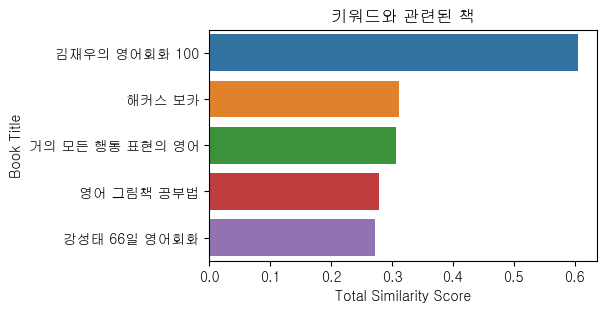

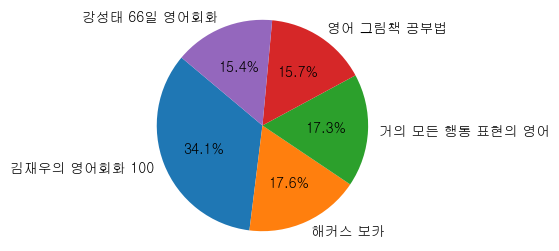

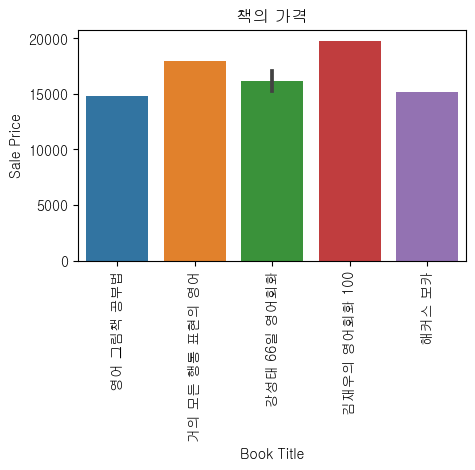

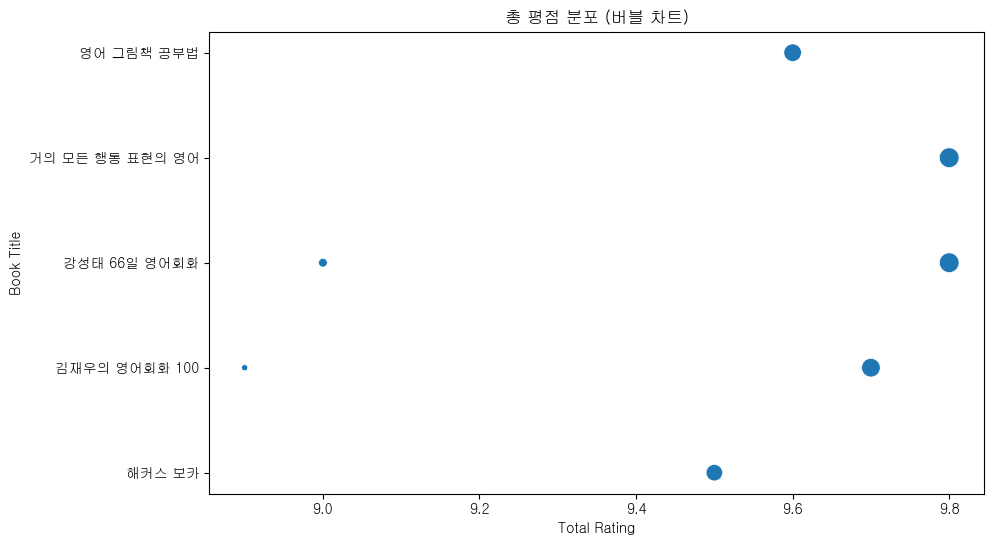

'김재우의 영어회화 100'의 관련 문장:
--------------------------------------------------
1: 단 한 번도 영미권 국가에서 생활해 본 적 없이 순수 국내에서만 공부하고도 원어민이 놀라는 영어 실력을 구사하는 김재우 선생님의 20여 년간에 걸쳐 다듬어 온 영어 콘텐츠의 정수를... [Score: 0.32]
2: “정말 많은 분이 영어가 입으로 나오지 않아 답답해 하는 걸 가까이서 오랫동안 봐 왔습니다. 시간 투자 대비 너무 가성비가 안 좋은 겁니다. ‘왜 한 만큼 늘지 않을까? 왜? 도대... [Score: 0.28]


'해커스 보카'의 관련 문장:
--------------------------------------------------
1: 『Hackers Vocabulary』는 최신 토플 경향 및 시험에 출제된 단어들을 완벽 분석한 교재로, 토플 목표 점수 달성과 영어 실력을 향상시킬 수 있는 “대한민국 표준 영어 ... [Score: 0.10]


'거의 모든 행동 표현의 영어'의 관련 문장:
--------------------------------------------------
1: 사람들이 하는 대화의 대부분은 자신들이 과거에 했고 현재에 하고 있고 미래에 할 행동들입니다. 영어라고 크게 다를까요? 영화, 미드, 영어 소설과 에세이 등에서 쏟아져 나오는 것들... [Score: 0.16]
2: 영어를 잘하는 가장 빠른 지름길 중 하나가 우리가 하는 행동을 영어로 어떻게 표현하는지 정확히 아는 것이다. <거의 모든 행동 표현의 영어>는 이런 행동과 관련한 영어 표현의 거의... [Score: 0.15]


'영어 그림책 공부법'의 관련 문장:
--------------------------------------------------
1: 영어 리터러시 분야에서 가장 광범위하게 사용되고 있는 이론인 ‘균형 잡힌 문해법’을 토대로 3단계 영어 리터러시 스킬을 정리했다. 영어라는 언어 구조에 익숙해지게 하는 

In [97]:
### 사용자로부터 키워드 입력 받기
def input_keywords():
    keywords_input = input("원하는 키워드를 입력하고 엔터를 눌러주세요(여러개 입력 시 ',' 으로 구분해주세요): ")
    keywords = [keyword.strip() for keyword in keywords_input.split(',')]
    return keywords

# 리뷰 데이터 로드 및 준비
def load_and_prepare_data(file_path):
    data = pd.read_csv(file_path)
    data['introduction'] = data['introduction'].fillna("")  # 빈 리뷰를 빈 문자열로 대체
    return data

# 키워드와 리뷰 간의 유사도 계산
def calculate_similarity(data, keywords):
    # 키워드를 하나의 문자열로 결합
    keywords_string = " ".join(keywords)
    # 데이터프레임에 새로운 행을 추가하여 키워드 문자열을 'introduction' 컬럼에 저장
    # 필요한 컬럼 수와 일치하도록 None 값으로 다른 컬럼을 채웁니다
    new_row = [None] * len(data.columns)  # 데이터프레임의 컬럼 수에 맞는 길이의 리스트 생성
    intro_col_index = data.columns.get_loc('introduction')  # 'introduction' 컬럼의 인덱스를 찾음
    new_row[intro_col_index] = keywords_string  # 키워드 문자열을 해당 위치에 할당
    data.loc[len(data)] = new_row  # 새로운 행을 데이터프레임에 추가
    # TF-IDF 벡터라이저 초기화 및 'introduction' 컬럼의 텍스트를 벡터화
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['introduction'])
    # 마지막 벡터(키워드 문자열)와 모든 'introduction' 벡터 간의 코사인 유사도 계산
    cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()
    # 유사도 점수를 데이터프레임에 추가 ('similarity_score' 컬럼 생성)
    data['similarity_score'] = np.append(cosine_similarities, 0)  # 마지막 행(키워드 행)에는 0 할당
    return data

# 유사도가 높은 상위 5권의 책 시각화
def visualize_top_books(data):
    similarity_scores_sum = data.iloc[:-1].groupby('title')['similarity_score'].sum()
    sorted_books_by_similarity = similarity_scores_sum.sort_values(ascending=False).head(5)
    plt.figure(figsize=(5, 3))
    sns.barplot(x=sorted_books_by_similarity.values, y=sorted_books_by_similarity.index)
    plt.title('키워드와 관련된 책')
    plt.xlabel('Total Similarity Score')
    plt.ylabel('Book Title')
    plt.show()
    return sorted_books_by_similarity.index[:10]

# 유사도가 높은 상위 5권의 책을 파이 차트로 시각화
def visualize_top_books_pie(data):
    similarity_scores_sum = data.iloc[:-1].groupby('title')['similarity_score'].sum()
    sorted_books_by_similarity = similarity_scores_sum.sort_values(ascending=False).head(5)
    plt.figure(figsize=(3, 3))
    pie = plt.pie(sorted_books_by_similarity, labels=sorted_books_by_similarity.index, autopct='%1.1f%%', startangle=140)
    # plt.title('유사도가 높은 상위 10권의 책')
    plt.axis('equal')  # 원형으로 보이도록 설정
    plt.show()


# 책의 가격 시각화
def visualize_book_prices(data, top_books):
    # 'sale_price' 열에서 '원'을 제거하고 숫자만 추출하여 가격을 변환
    data['sale_price'] = data['sale_price'].str.replace('원', '').str.replace(',', '').astype(float)
    
    plt.figure(figsize=(5, 3))
    sns.barplot(x='title', y='sale_price', data=data[data['title'].isin(top_books)])
    plt.title('책의 가격')
    plt.xlabel('Book Title')
    plt.ylabel('Sale Price')
    plt.xticks(rotation=90)  # x축 레이블 회전
    plt.show()


# 총 평점을 버블 차트로 시각화
def visualize_ratings_bubble(data, top_books):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_rating', y='title', size='total_rating', data=data[data['title'].isin(top_books)], sizes=(20, 200), legend=False)
    plt.title('총 평점 분포 (버블 차트)')
    plt.xlabel('Total Rating')
    plt.ylabel('Book Title')
    plt.show()



# 각 책별 유사도가 높은 상위 5개 리뷰 추출 및 출력
def extract_top_reviews(data, top_books):
    for book in top_books:
        print(f"'{book}'의 관련 문장:\n" + "-" * 50)
        # 'title'과 'introduction' 기준으로 중복 제거
        unique_data = data.drop_duplicates(subset=['title', 'introduction'])
        book_reviews = unique_data[unique_data['title'] == book].sort_values(by='similarity_score', ascending=False).head(5)
        for idx, row in enumerate(book_reviews.itertuples(), 1):
            print(f"{idx}: {row.introduction[:100]}... [Score: {row.similarity_score:.2f}]")
        print("\n")

# 메인 함수: 위의 모든 함수를 순차적으로 호출
def main():
    file_path = 'C:/Users/Taeho/Desktop/project/data2.csv'  # 파일 경로
    keywords = input_keywords()  # 키워드 입력 받기

    data = load_and_prepare_data(file_path)  # 데이터 로드 및 준비
    data_with_similarity = calculate_similarity(data, keywords)  # 유사도 계산
    top_books_by_similarity = visualize_top_books(data_with_similarity)  # 상위 3권 책 시각화
    visualize_top_books_pie(data_with_similarity)  # 유사도가 높은 상위 5권의 책을 파이 차트로 시각화
    visualize_book_prices(data, top_books_by_similarity)  # 책의 가격 시각화
    visualize_ratings_bubble(data, top_books_by_similarity)  # 총 평점을 버블 차트로 시각화

    extract_top_reviews(data_with_similarity, top_books_by_similarity)  # 상위 5개 리뷰 출력
main()